# SVM (Support Vector Machine)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=.2,random_state=42)

In [12]:
# 모델 학습 및 평가
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)

model.score(X_test,y_test)

1.0

In [13]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
# 데이터 준비 (데이터프레임 생성 -> 특성 두 개만 이용)
df=pd.DataFrame(iris_data.data[:,:2],columns=iris_data.feature_names[:2])
df['target']=iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [20]:
# 훈련/테스트 데이터 분리
X=iris_data.data[:,:2]
y=iris_data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [37]:
# 모델 학습 및 평가
svm_clf=SVC(kernel='linear',C=1.0)

svm_clf.fit(X_train,y_train)
      
svm_clf.score(X_train,y_train),svm_clf.score(X_test,y_test)

(0.8, 0.9)

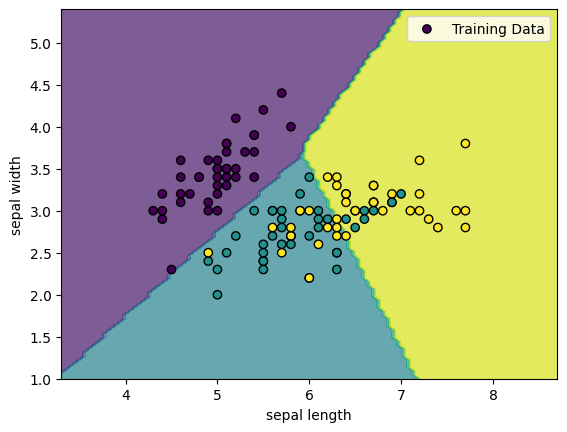

In [38]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
dbd=DecisionBoundaryDisplay.from_estimator(svm_clf,X_train,alpha=.7)

# 훈련데이터 산점도
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors='k',label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

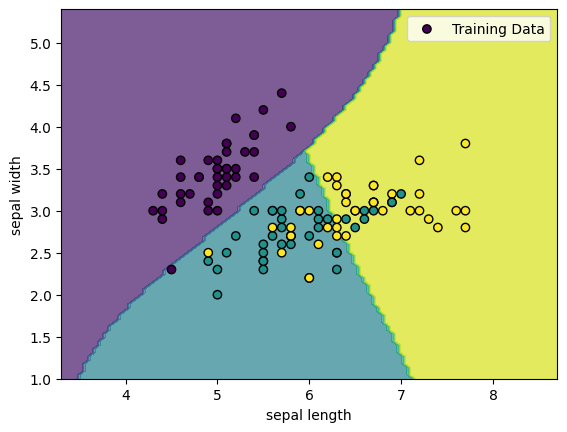

In [49]:
# RBF 커널 사용 시각화
svm_clf=SVC(kernel='rbf',C=1.0, gamma=0.5)

svm_clf.fit(X_train,y_train)
      
svm_clf.score(X_train,y_train),svm_clf.score(X_test,y_test)

# 결정 경계
dbd=DecisionBoundaryDisplay.from_estimator(svm_clf,X_train,alpha=.7)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors='k',label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# SVR (Support Vector Regressor)

| 특징                   | SVM                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |

**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [56]:
np.random.seed(0)
X=np.sort(np.random.rand(40,1)*5,axis=0)
y=np.sin(X).ravel()+np.random.randn(40)*0.1

X_test=np.linspace(0,5,100).reshape(-1,1)

In [66]:
# 모델 학습 및 예측
from sklearn.svm import SVR

# linear, poly 커널 적용
svr_rbf=SVR(kernel='rbf')
svr_linear=SVR(kernel='linear')
svr_poly=SVR(kernel='poly')

# 학습
svr_rbf.fit(X,y)
svr_linear.fit(X,y)
svr_poly.fit(X,y)

# 예측
pred_rbf=svr_rbf.predict(X_test)
pred_linear=svr_linear.predict(X_test)
pred_poly=svr_poly.predict(X_test)

0.1


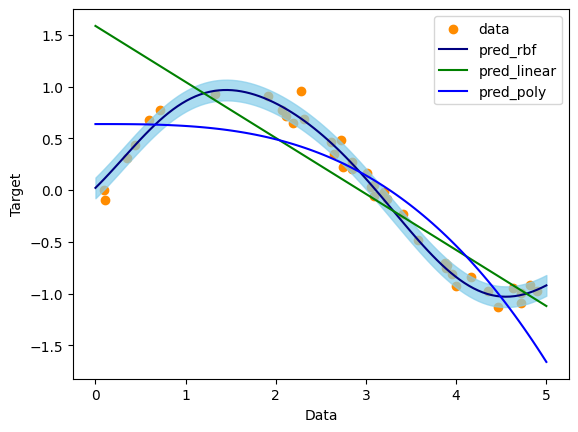

In [77]:
# 결과 시각화
plt.scatter(X,y,color='darkorange',label='data')
plt.plot(X_test,pred_rbf,color='navy',label='pred_rbf')
plt.plot(X_test,pred_linear,color='green',label='pred_linear')
plt.plot(X_test,pred_poly,color='blue',label='pred_poly')

# epsilon 오차 범위 시각화
svr_rbf_epsilon=svr_rbf.epsilon
print(svr_rbf_epsilon)
epsilon_upper=pred_rbf+svr_rbf_epsilon
epsilon_lower=pred_rbf-svr_rbf_epsilon
plt.fill_between(X_test.ravel(),epsilon_lower,epsilon_upper, color='skyblue',alpha=0.7)


plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

##### 캘리포니아 주택 가격 예측

In [ ]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data=fetch_california_housing()

In [ ]:
# 데이터 분리 및 스케일링

In [ ]:
# SVR 모델 훈련 및 평가